# 1. intro

## 1.1 about dataset

<p>this dataseet is used for market basket analysis, product recommendations and store optimization.
but i'll use it for improving my data analysis skill.
</p>

## 1.2 dataset link

<p>we are going to use <a href="https://www.kaggle.com/datasets/bhavikjikadara/grocery-store-dataset">this<a /> dataset</p>

# 2. understand dataset

## 2.1 import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Union

## 2.2 read dataset

In [2]:
df = pd.read_csv('./GroceryDataset.csv')

## 2.3 getting some information

### 2.3.1 see some rows, and rename all columns

In [3]:
df = df.rename(
    columns={
        'Price': 'price', 
        'Sub Category':"sub_category", 
        'Discount':'discount',
        'Rating':'rating',
        'Title':'title',
        'Currency':'currency',
        'Feature':'feature',
        'Product Description':'description'
    }
)
df.head()

,sub_category,price,discount,rating,title,currency,feature,description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...


### 2.3.2 understand some features types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sub_category  1757 non-null   object
 1   price         1754 non-null   object
 2   discount      1757 non-null   object
 3   rating        682 non-null    object
 4   title         1757 non-null   object
 5   currency      1752 non-null   object
 6   feature       1739 non-null   object
 7   description   1715 non-null   object
dtypes: object(8)
memory usage: 109.9+ KB


### 2.3.3 features name

In [5]:
df.columns

Index(['sub_category', 'price', 'discount', 'rating', 'title', 'currency',
       'feature', 'description'],
      dtype='object')

### 2.3.4 dataset shape

In [6]:
df.shape

(1757, 8)

### 2.3.4 check for missed datas

In [7]:
df.isnull().sum()

sub_category       0
price              3
discount           0
rating          1075
title              0
currency           5
feature           18
description       42
dtype: int64

## 2.4 analysis results

1. **feature analysis**:
    - *sub-ategory*: This column categorizes the grocery items into subcategories, providing a detailed classification for easier analysis and organization.
    - *price*: Represents the monetary value of the grocery item, indicating its cost or retail price in the specified currency.
    - *discount*: Reflects any discounts or promotional offers applicable to the respective grocery item, providing insights into pricing strategies.
    - *rating*: Indicates customer satisfaction or product quality based on user ratings, offering a measure of the overall perceived value of the grocery item.
    - *title*: Describes the name or title of the grocery item, providing a concise identifier for easy reference and understanding.
    - *currency*: Specifies the currency in which the prices are denominated, facilitating proper interpretation and comparison of monetary values.
    - *feature*: Includes features or characteristics of the grocery item, offering additional information about its unique attributes or selling points.
    - *description*: Provides a detailed textual description of the grocery item, offering comprehensive information about its specifications, uses, and other relevant details. This column is handy for understanding product details beyond what is captured in other columns.


2. **dataset**:
    - dataset contains 8 categorical rows 
    - some rows such as Price, Discount, Rating shall be numerical and i'll do it in feature engineering part
    - we need a new feature for riviews

3. **missed datas**:
    - *price*: i'll fill them using KNN or maybe just average to fill null fields.
    - *discount*: well most of rows have no discount so we may remove this column.
    - *rating*: it's actuly normal to be null, peaple are tired eanugh for not rating what they buy
    - *currency*: all currency are using dollar, the null ones will fill as dollar or we may just ignore this column.
    - *feature*: we dont need this row, it is only a categorical column for users to know what they are buying
    - *description*: we dont need this row, it is only a categorical column for users to know what they are buying

## 2.5 getting unique values of dataset

### 2.5.1 total unique values

In [8]:
pd.DataFrame(df.nunique(), columns=['unique valuescount'])

,unique valuescount
sub_category,19
price,184
discount,42
rating,483
title,1484
currency,1
feature,1401
description,1435


### 2.5.2 getting all features unique values

In [9]:
def get_categorical_features(dataFrame):
    categorical_features = []
    for i in dataFrame:
        if not pd.api.types.is_numeric_dtype(dataFrame[i].dtypes):
            categorical_features.append(i)
    return categorical_features

In [10]:
# we first save features name
categorical_features = get_categorical_features(df)
categorical_features

['sub_category',
 'price',
 'discount',
 'rating',
 'title',
 'currency',
 'feature',
 'description']

In [11]:
def get_categorical_unique(name:str, dataFrame:pd.DataFrame):
    print("#"*10, name, "#"*10)
    print(pd.DataFrame(dataFrame[name].unique(), columns=["unique values"]), end="\n\n\n")

In [12]:
get_categorical_unique("sub_category", df)
get_categorical_unique("currency", df)

########## sub_category ##########
                   unique values
0              Bakery & Desserts
1              Beverages & Water
2                      Breakfast
3                          Candy
4              Cleaning Supplies
5                         Coffee
6                           Deli
7                         Floral
8                   Gift Baskets
9                      Household
10    Kirkland Signature Grocery
11  Laundry Detergent & Supplies
12                Meat & Seafood
13                       Organic
14            Pantry & Dry Goods
15      Paper & Plastic Products
16                       Poultry
17                       Seafood
18                        Snacks


########## currency ##########
  unique values
0             $
1           NaN




## 2.6 analysis categorical features result

- the only unique value in currency is $
- we've got 19 unique values in sub_category

# 3. feature engineering

## 3.1 working on price column

### 3.1.1 convert price from string to float

In [13]:
def to_float_price(str_list: List[str]) -> np.ndarray:
    """
    convert a list of string prices to float values.
    
    this function handles various price formats:
    - NaN values are converted to 0.0
    - prices with commas have commas removed
    - prices with "through-" format are averaged
    - regular prices with currency symbols are converted to float
    """
    numbers = []
    
    for i, price_str in enumerate(str_list):
        if pd.isna(price_str):
            numbers.append(0.0)
            continue
            
        if "," in price_str:
            price_str = price_str.replace(",", "")
            
        if "through-" in price_str:
            prices = price_str.split("through-")
            price_sum = sum(float(p[1:]) for p in prices)
            average_price = price_sum / len(prices)
            numbers.append(average_price)
            continue
            
        try:
            num = float(price_str[1:].strip())
            numbers.append(num)
        except (ValueError, IndexError):
            p = df.price[i]
            num = float(str(p[1:]).strip())
            numbers.append(num)
    
    return np.array(numbers, dtype=float)

In [14]:
df['price'] = to_float_price(df['price'])

### 3.1.2 fill the 0 fields using average

In [15]:
# we've got 3 nulls! so no problem for using average value for them
sum(df['price'] == 0) 

3

In [16]:
df['price'] = df['price'].replace(to_replace=0, value=df['price'].mean())

In [17]:
# now we have no 0 values in field price
sum(df['price'] == 0) 

0

## 3.2 working on rating column

In [18]:
def convert_rating_to_float(ratings: list[str]) -> np.ndarray:
    """
    convert a list of string ratings to a numpy array of float values.
    
    ratings (list[str]): List of string ratings in a specific format.
    expected format is a string where the rating is at positions 6-9.
    if the expected number dose not have a dot (.) it means we've got an integer
    NaN values are converted to 0.0.
    """
    new_ratings = []
    for i in range(len(ratings)):
        s = ratings[i]
        try:
            if pd.isna(s) or "No Reviews" in s or "through" in s:
                new_ratings.append(0.0)
            elif s[7] != ".":
                number = float(s[6])
                new_ratings.append(number)
            else:
                number = float(s[6:9])
                new_ratings.append(number)
        except:
            print(s[6])
            print(s)
    return np.array(new_ratings, dtype=float)

## 3.3 create rivew count column

In [19]:
def get_review_count_from_rating(ratings: list[str]) -> np.ndarray:
    """
    extract review counts from a list of rating strings.
    
    this function processes a list of rating strings and extracts the number of reviews
    from each string. It handles various edge cases such as missing values, "No Reviews"
    text, and specific string formats.
    
    """
    counts = []
    for i in range(len(ratings)):
        s = ratings[i]
        if pd.isna(s) or "No Reviews" in s or "through" in s:
            counts.append(0)
        else:
            s = s[:-9].split('on ')[1]
            number = int(s)
            counts.append(number)
    return np.array(counts)

## 3.4 working on off column

## 3.5 finalize

In [20]:
df['review_count'] = get_review_count_from_rating(df['rating'])
df['rating'] = convert_rating_to_float(df['rating'])
df.drop(columns=['currency', 'feature', 'description', 'title', 'discount'], inplace=True)

# 4. statistic analysis

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1757.0,61.292421,121.292769,3.99,14.99,23.99,52.99,1999.99
rating,1757.0,1.524189,2.094295,0.00,0.00,0.00,4.20,5.00
review_count,1757.0,248.021059,906.360902,0.00,0.00,0.00,53.00,18098.00


In [22]:
df.corr(numeric_only=True)

,price,rating,review_count
price,1.000000,0.402926,0.032997
rating,0.402926,1.000000,0.383132
review_count,0.032997,0.383132,1.000000


## 4.1 analysis results

maybe next time, i need sleep

# 5. using plots for understanding data

In [23]:
df

,sub_category,price,rating,review_count
0,Bakery & Desserts,56.99,4.3,265
1,Bakery & Desserts,159.99,5.0,1
2,Bakery & Desserts,44.99,4.1,441
3,Bakery & Desserts,39.99,4.7,9459
4,Bakery & Desserts,59.99,4.5,758
...,...,...,...,...
1752,Snacks,23.99,0.0,0
1753,Snacks,49.99,0.0,0
1754,Snacks,22.99,0.0,0
1755,Snacks,17.49,0.0,0


## 5.1 most purchased categories

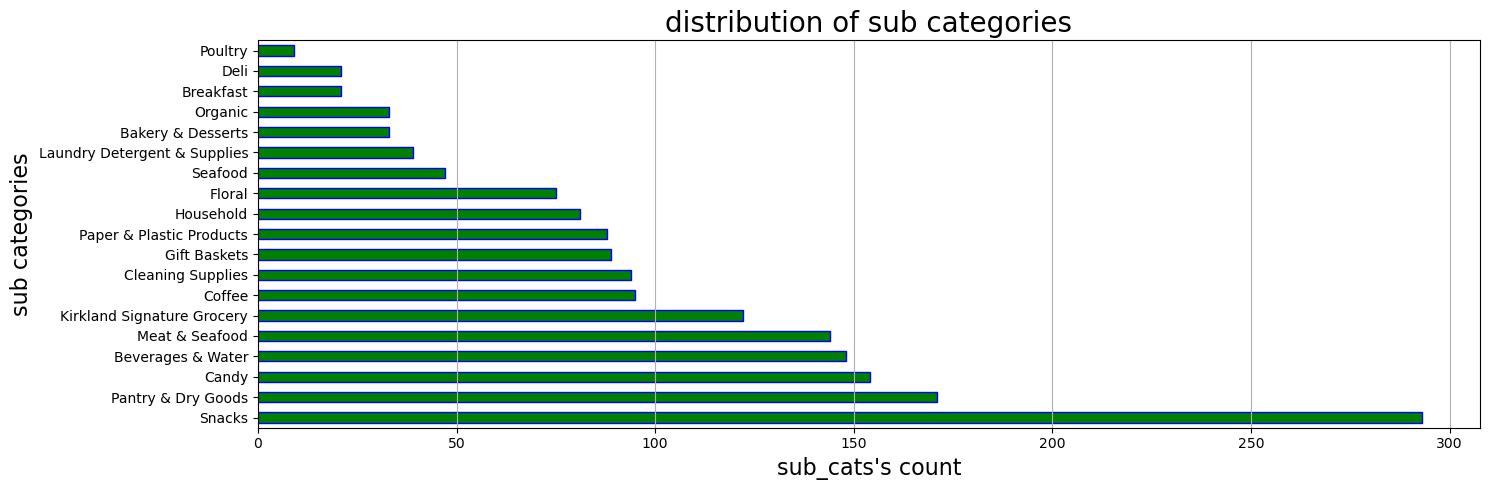

In [50]:
plt.figure(figsize=(15, 5))
sub_cat_counts = df['sub_category'].value_counts()
sub_cat_counts.plot(kind='barh', color='green', edgecolor='blue')
plt.title("distribution of sub categories", fontsize=20)
plt.xlabel("sub_cats's count", fontsize=16)
plt.ylabel("sub categories", fontsize=16)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## 5.2 which sub category got most of customers money

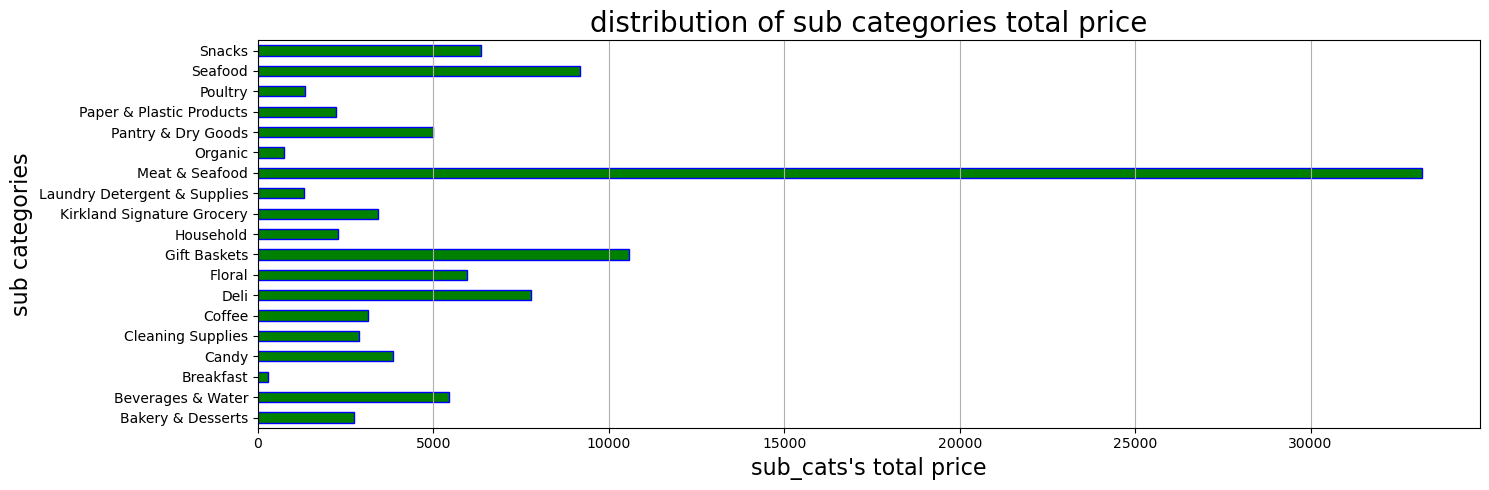

In [51]:
total_prices = df.groupby(['sub_category'])['price'].sum()
plt.figure(figsize=(15, 5))
total_prices.plot(kind='barh', color='green', edgecolor='blue')
plt.title("distribution of sub categories total price", fontsize=20)
plt.xlabel("sub_cats's total price", fontsize=16)
plt.ylabel("sub categories", fontsize=16)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## 5.3 average ratings

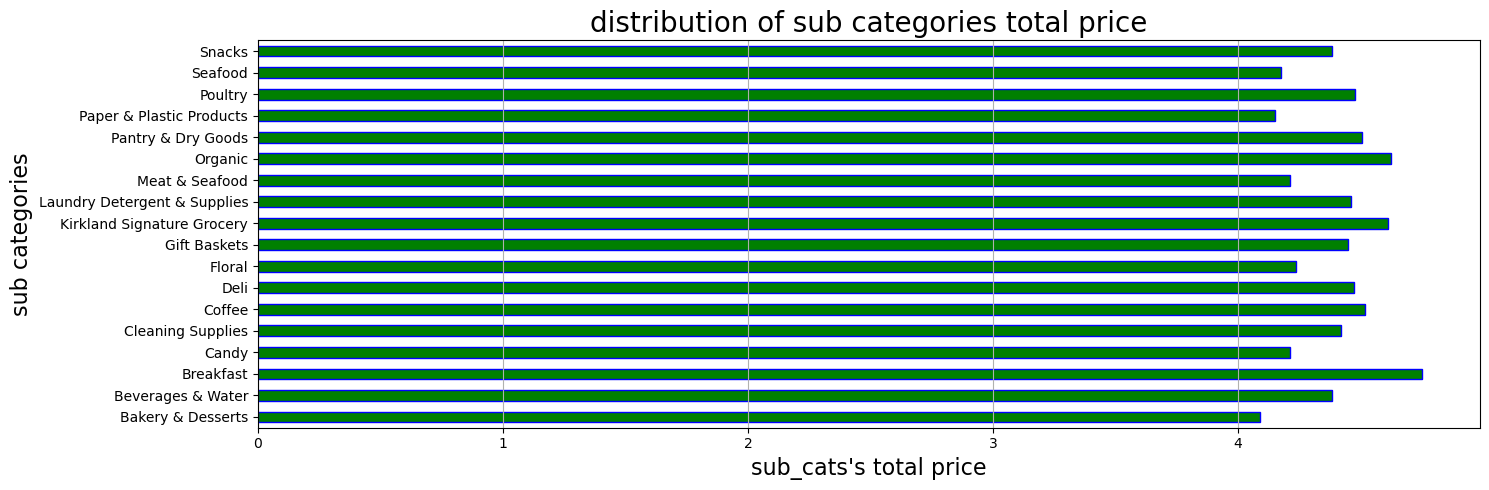

In [62]:
# we need to ignore rating 0 
total_prices = df.query('rating != 0').groupby(['sub_category'])['rating'].mean() 
plt.figure(figsize=(15, 5))
total_prices.plot(kind='barh', color='green', edgecolor='blue')
plt.title("distribution of sub categories total price", fontsize=20)
plt.xlabel("sub_cats's total price", fontsize=16)
plt.ylabel("sub categories", fontsize=16)
plt.grid(axis='x')
plt.tight_layout()
plt.show()